<a href="https://colab.research.google.com/github/vrhughes/DS3001Group/blob/main/Results/Group%20Stage%20Data/VH_Data_kaggle1_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the data over from Github
! git clone https://github.com/vrhughes/DS3001Group

Cloning into 'DS3001Group'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 298 (delta 100), reused 7 (delta 7), pack-reused 126 (from 1)
Receiving objects: 100% (298/298), 2.31 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [2]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Saving all of the group AND finals data to a dataframe variable
data = pd.read_csv('https://raw.githubusercontent.com/vrhughes/DS3001Group/main/Data/kaggle1.csv')

# Taking an initial look at the data
#display(data)

# Removing variables that are superfluous and/or unrelated to match performance
data = data.drop(['date', 'hour', 'left channel team1', 'left channel team2', 'left inside channel team1', 'left inside channel team2', 'central channel team1', 'central channel team2', 'right inside channel team1', 'right inside channel team2', 'right channel team1', 'right channel team2', 'own goals team1', 'own goals team2', 'possession in contest'], axis=1)
data = data.drop(['total offers to receive team1', 'total offers to receive team2', 'inbehind offers to receive team1', 'inbehind offers to receive team2', 'inbetween offers to receive team1', 'inbetween offers to receive team2', 'infront offers to receive team1', 'infront offers to receive team2', 'receptions between midfield and defensive lines team1', 'receptions between midfield and defensive lines team2', 'attempted line breaks team1', 'attempted line breaks team2', 'completed line breaksteam1', 'completed line breaks team2', 'attempted defensive line breaks team1', 'attempted defensive line breaks team2', 'switches of play completed team1', 'switches of play completed team2'], axis=1)

# Adjusting the names of some incorrect data
data = data.rename(columns={'attempts inside the penalty area  team2': 'attempts inside the penalty area team2'})
data = data.rename(columns={'attempts outside the penalty area  team1': 'attempts outside the penalty area team1'})
data = data.rename(columns={'attempts outside the penalty area  team2': 'attempts outside the penalty area team2'})
data = data.rename(columns={'completed defensive line breaksteam1': 'completed defensive line breaks team1'})

# Looking at the data again
#display(data)

Now that we've removed most of the irrelevant data we have a clearer view and can ask some questions.



In [4]:
####################################################################################################

Now I'll look at if there's any significant correlation between the percentage of the time that a team had possession of the ball and whether or not they won a particular game.

In [5]:
# Because our only goal with this data is to look at group stage results, we'll remove finals data
group_stage_data = data[data['category'].str.contains('Group')]
#group_stage_data.head()

# Removed about 16 rows of finals data,

In [21]:
# Adding another column to the group_stage_data that's true if team1 has more goals and false if team2 has more goals:
group_stage_data.loc[:, 'team1 won'] = group_stage_data['number of goals team1'] > group_stage_data['number of goals team2']
#group_stage_data.head()

In [7]:
# Creating an array more_possesion_wins2 that iterates through group_stage_data and increase by one if possession team1 is greater than possession team2 and team1 won is true:
more_possession_wins = 0
less_possession_wins = 0
for i in range(len(group_stage_data)):
  if group_stage_data['possession team1'][i] > group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == True:
    more_possession_wins += 1
  elif group_stage_data['possession team1'][i] < group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == True:
    less_possession_wins += 1
  if group_stage_data['possession team1'][i] < group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == False:
    more_possession_wins += 1
  elif group_stage_data['possession team1'][i] > group_stage_data['possession team2'][i] and group_stage_data['team1 won'][i] == False:
    less_possession_wins += 1

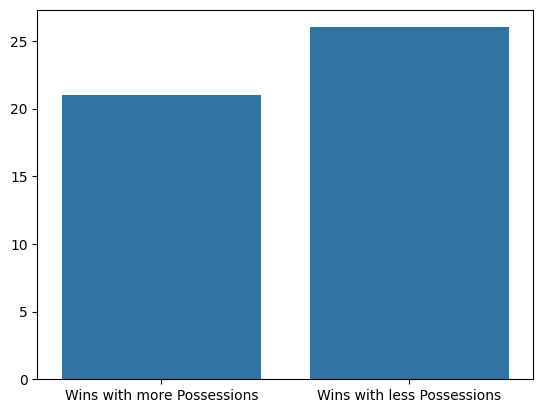

In [8]:
# Making a bar graph of the more_possessions_wins and more_possessions_losses data:
# The x_axis will have labels Wins and Losses, and the data will by on the y_axis:
sns.barplot(x=['Wins with more Possessions', 'Wins with less Possessions'], y=[more_possession_wins, less_possession_wins])
plt.show()

This is interesting, because it seems there isn't a large correlation between have possession of the ball and actually winning a game. This result can be used to inform how we model the finals matches with the other data.

In [9]:
####################################################################################################

I'll now do a similar analysis, but with the number of attempted goals per team. It'll be intersting to see if there's a better correlation between this variable and winning a match.

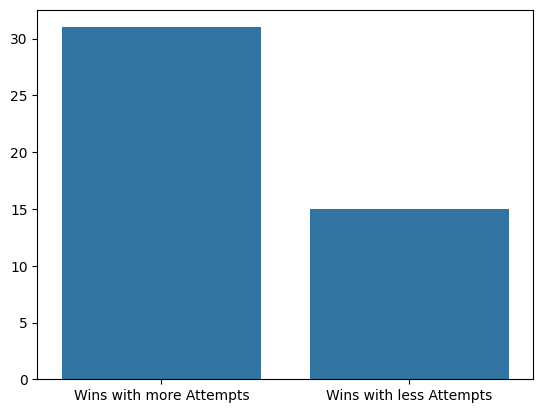

In [10]:
more_attempts_wins = 0
less_attempts_wins = 0
for i in range(len(group_stage_data)):
  if group_stage_data['total attempts team1'][i] > group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == True:
    more_attempts_wins += 1
  elif group_stage_data['total attempts team1'][i] < group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == True:
    less_attempts_wins += 1
  if group_stage_data['total attempts team1'][i] < group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == False:
    more_attempts_wins += 1
  elif group_stage_data['total attempts team1'][i] > group_stage_data['total attempts team2'][i] and group_stage_data['team1 won'][i] == False:
    less_attempts_wins += 1

sns.barplot(x=['Wins with more Attempts', 'Wins with less Attempts'], y=[more_attempts_wins, less_attempts_wins])
plt.show()

This data is more conclusive. It shows that teams which make more scoring attempts (even if they miss them) tend to win more frequently than teams making less scoring attempts.

In [11]:
####################################################################################################

Given how limited our data is, it will be difficult to run a comprehensive regession on the outcome of the finals matches.

We will run a logit regression on the deltas between the variables corresponding to team1 and team2 that can then be used to predict individual match outcomes.

In [12]:
# Multi-nomial logit
# Use Sci-Kit to run

# Use Sci-Kit to run regression on did home team win times deltas between different variables

In [14]:
# Displaying the group_stage_data variable in it's entirety to see each of the column names
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", 2)
display(group_stage_data)
group_stage_data.shape

,team1,team2,possession team1,possession team2,number of goals team1,number of goals team2,category,total attempts team1,total attempts team2,conceded team1,...,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,team1 won
0,QATAR,ECUADOR,42%,50%,0,2,Group A,5,6,2,...,17,0,1,6,5,52,72,256,279,False
1,ENGLAND,IRAN,72%,19%,6,2,Group B,13,8,2,...,10,0,1,8,13,63,72,139,416,True
2,SENEGAL,NETHERLANDS,44%,45%,0,2,Group A,14,9,2,...,14,0,0,9,15,63,73,263,251,False
3,UNITED STATES,WALES,51%,39%,1,1,Group B,6,7,1,...,15,0,1,7,7,81,72,242,292,False
4,ARGENTINA,SAUDI ARABIA,64%,24%,1,2,Group C,14,3,2,...,16,1,0,4,14,65,80,163,361,False
5,DENMARK,TUNISIA,55%,33%,0,0,Group D,11,11,0,...,10,0,0,11,11,76,73,226,287,False
6,MEXICO,POLAND,54%,31%,0,0,Group C,13,8,0,...,16,0,0,8,15,61,70,193,290,False
7,FRANCE,AUSTRALIA,56%,35%,4,1,Group D,22,4,1,...,5,0,0,4,22,64,56,250,316,True
8,MOROCCO,CROATIA,32%,57%,0,0,Group F,8,6,0,...,17,0,0,7,8,87,58,391,217,False
9,GERMANY,JAPAN,65%,22%,1,2,Group E,25,10,2,...,10,1,0,12,26,55,87,164,487,False


(48, 56)

In [16]:
# Creating a new dataframe that represents the differences between team1 and team2 for each variable

# Creating a new dataframe "Deltas" that only has the team1 and team2 variable from group_stage_data
deltas = group_stage_data[['team1 won', 'team1', 'team2']].copy()
deltas['possession'] = group_stage_data['possession team1'].str.rstrip('%').astype('float') / 100.0 - group_stage_data['possession team2'].str.rstrip('%').astype('float') / 100.0
deltas['number of goals'] = group_stage_data['number of goals team1'] - group_stage_data['number of goals team2']
deltas['total attempts'] = group_stage_data['total attempts team1'] - group_stage_data['total attempts team2']
deltas['conceded'] = group_stage_data['conceded team1'] - group_stage_data['conceded team2']
deltas['goal inside the penalty area'] = group_stage_data['goal inside the penalty area team1'] - group_stage_data['goal inside the penalty area team2']
deltas['goal outside the penalty area'] = group_stage_data['goal outside the penalty area team1'] - group_stage_data['goal outside the penalty area team2']
deltas['assists'] = group_stage_data['assists team1'] - group_stage_data['assists team2']
deltas['on target attempts'] = group_stage_data['on target attempts team1'] - group_stage_data['on target attempts team2']
deltas['off target attempts'] = group_stage_data['off target attempts team1'] - group_stage_data['off target attempts team2']
deltas['attempts inside the penalty area'] = group_stage_data['attempts inside the penalty area team1'] - group_stage_data['attempts inside the penalty area team2']
deltas['attempts outside the penalty area'] = group_stage_data['attempts outside the penalty area team1'] - group_stage_data['attempts outside the penalty area team2']
deltas['completed defensive line breaks'] = group_stage_data['completed defensive line breaks team1'] - group_stage_data['completed defensive line breaks team2']
deltas['yellow cards'] = group_stage_data['yellow cards team1'] - group_stage_data['yellow cards team2']
deltas['red cards'] = group_stage_data['red cards team1'] - group_stage_data['red cards team2']
#deltas['fouls against'] = group_stage_data['fouls against team1'] - group_stage_data['fouls against team2']
#deltas['offsides'] = group_stage_data['offsides team1'] - group_stage_data['offsides team2']
#deltas['passes'] = group_stage_data['passes team1'] - group_stage_data['passes team2']
#deltas['passes completed'] = group_stage_data['passes completed team1'] - group_stage_data['passes completed team2']
#deltas['crosses'] = group_stage_data['crosses team1'] - group_stage_data['crosses team2']
#deltas['crosses completed'] = group_stage_data['crosses completed team1'] - group_stage_data['crosses completed team2']
#deltas['corners'] = group_stage_data['corners team1'] - group_stage_data['corners team2']
#deltas['free kicks'] = group_stage_data['free kicks team1'] - group_stage_data['free kicks team2']
#deltas['penalties scored'] = group_stage_data['penalties scored team1'] - group_stage_data['penalties scored team2']
#deltas['goal preventions'] = group_stage_data['goal preventions team1'] - group_stage_data['goal preventions team2']
#deltas['forced turnovers'] = group_stage_data['forced turnovers team1'] - group_stage_data['forced turnovers team2']
#deltas['defensive pressures applied'] = group_stage_data['defensive pressures applied team1'] - group_stage_data['defensive pressures applied team2']

deltas.shape

(48, 17)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into X, our predictor variables, and Y, what we're trying to predict
# The X dataframe is the deltas dataframe without the first column
X = deltas.iloc[:, 1:]
# The Y dataframe is the first column of the deltas dataframe
Y = deltas.iloc[:, 0]

# One-hot encoding the team1 and team2 columns of the X data:
X = pd.get_dummies(X, columns=['team1', 'team2'])

In [18]:
# Train, test, splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36, 78)
(12, 78)
(36,)
(12,)


In [19]:
# Making an instance of the linear regression model
log_reg = LogisticRegression()

# Fitting the model to the data
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [20]:
# Printing the accuracy of the model
print(log_reg.score(X_test, Y_test))

1.0
